In [25]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
from time import time

np.random.seed(2006)

In [7]:
# matrix
matr = np.zeros((100, 100))
t=500
while t>0:
    i = np.random.randint(0, 100)
    j = np.random.randint(0, 100)
    if i!=j and matr[i,j] != 1:
        weight = np.random.randint(1, 101)
        matr[i,j] = weight
        matr[j,i] = weight
        t -= 1

In [10]:
adlist = {}
    
for i in range(100):
    adlist[i] = []
    for j in range(100):
        if matr[i][j]!=0:
            adlist[i].append(j)
print(adlist)

{0: [3, 10, 14, 27, 38, 55, 73, 95, 98], 1: [3, 6, 14, 41, 64, 69], 2: [19, 50, 57, 61, 64, 65, 66, 67, 68, 73, 82], 3: [0, 1, 6, 41, 42, 45, 46, 49, 59, 63, 69, 83], 4: [7, 10, 11, 14, 18, 23, 27, 33, 46, 56, 81, 88], 5: [32, 36, 54, 61, 79, 84, 86], 6: [1, 3, 21, 46, 50, 55, 58, 82, 87, 90, 95], 7: [4, 15, 23, 28, 29, 43, 55, 58, 72], 8: [25, 41, 43, 47, 48, 49, 54, 57, 58, 84, 85, 88, 93], 9: [24, 27, 41, 42, 51, 53, 58, 59, 60, 81, 87, 90, 93], 10: [0, 4, 22, 69, 74, 82], 11: [4, 26, 37, 56, 57, 69, 71, 78, 80], 12: [17, 21, 37, 41, 55, 77, 88], 13: [17, 45, 59, 72], 14: [0, 1, 4, 17, 27, 38, 42, 46, 53, 57, 68, 75, 99], 15: [7, 18, 30, 46, 51, 72, 73, 77, 90], 16: [18, 46, 49, 50, 59, 79, 80, 99], 17: [12, 13, 14, 23, 28, 36, 38, 43, 45, 64, 66, 71, 85], 18: [4, 15, 16, 20, 32, 42, 57, 60, 87, 90, 92], 19: [2, 46, 56, 60, 75, 81, 84, 89, 92, 96], 20: [18, 40, 59, 63, 77, 83], 21: [6, 12, 49, 51, 60, 78, 85, 94], 22: [10, 28, 35, 54, 71, 77, 82, 86, 89], 23: [4, 7, 17, 33, 35, 42, 

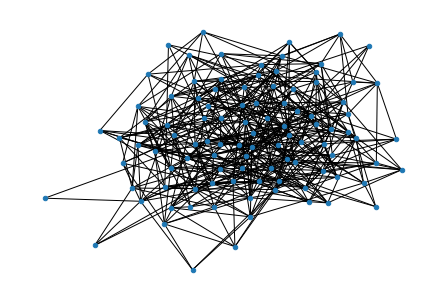

In [11]:
gr = nx.Graph(adlist)

nx.draw(gr, node_size = 20)
plt.show()

In [22]:
def count_time(method, g, st):
    l = []
    for i in range(10):
        start_time = time()
        method(g, st)
        l.append(time() - start_time)
    
    return np.array(l).mean()


print('Dijkstra:', count_time(nx.single_source_dijkstra, gr, 8))
print('Bellman-Ford:', count_time(nx.single_source_bellman_ford, gr, 8))

Dijkstra: 0.0006163120269775391
Bellman-Ford: 0.00158233642578125


# 2

In [89]:
def dist(a, b):
    (x1, y1) = a
    (x2, y2) = b
    return ((x1 - x2) ** 2 + (y1 - y2) ** 2) ** 0.5

In [43]:
g = nx.grid_2d_graph(10, 20)

edges_to_delete = np.random.randint(0, 20, size=(40, 2))
edges_to_delete = list(zip(edges_to_delete[:, 0], edges_to_delete[:, 1]))

g.remove_nodes_from(edges_to_delete)
pos = dict((i, i) for i in g.nodes())
labels = dict(((i, j), i * 10 + j) for i, j in g.nodes())

[(0, 19), (0, 18), (0, 17), (0, 16), (0, 15), (0, 14), (0, 13), (0, 12), (0, 11), (0, 10), (1, 10), (1, 9), (2, 9), (2, 8), (3, 8), (3, 7), (4, 7), (4, 6), (5, 6), (6, 6), (6, 5), (6, 4), (7, 4), (7, 3), (8, 3), (8, 2), (9, 2), (9, 1)]


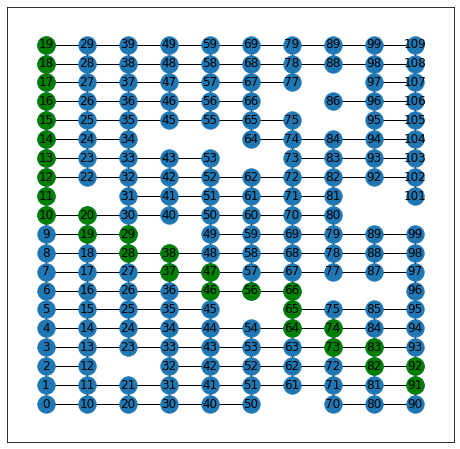

In [90]:
plt.figure(figsize=(8,8))
nx.draw_networkx(g, pos=pos, labels=labels)
path = nx.astar_path(g, (0, 19), (9,1), dist)
print(path)
nx.draw_networkx_nodes(g, pos, nodelist=path, node_color='g')

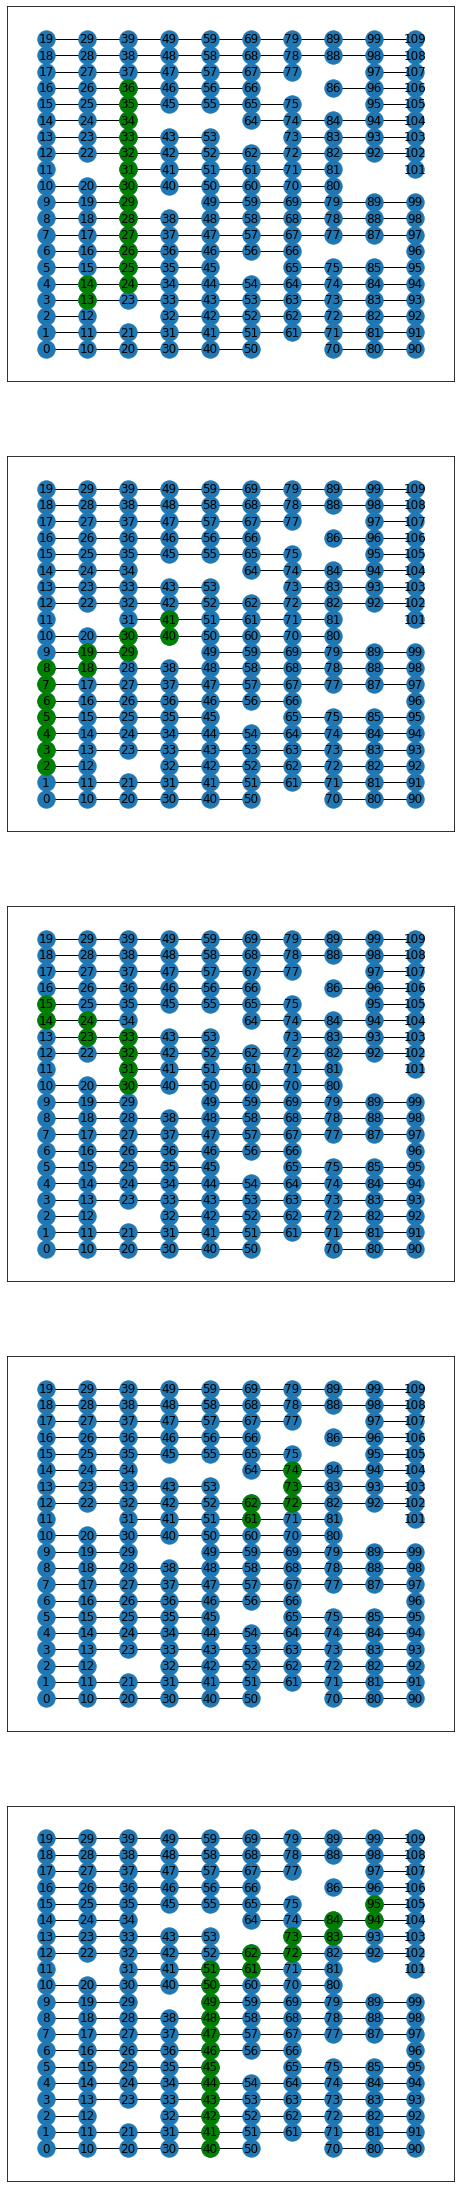

In [86]:
fig, ax = plt.subplots(5, 1, figsize=(8,40))
k=0
for i in range(5):
    st = (np.random.randint(0, 9), np.random.randint(0, 19))
    en = (np.random.randint(0, 9), np.random.randint(0, 19))
   
    
    if (st or en) not in edges_to_delete:
        nx.draw_networkx(g, pos=pos, labels=labels, ax=ax[i])
        path = nx.astar_path(g, st, en, dist)
        nx.draw_networkx_nodes(g, pos, nodelist=path, node_color='g', ax=ax[i])
        k+=1
    else: continue